In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.dates as mdates
import datetime
from pandas.plotting import scatter_matrix

from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sn

# Note: Figures are generated for black background PPT.
# Some cells may not work in order.

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
import copy
import math

# Data Cleaning

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
subs_df = pd.read_pickle(r'data/data_1/subscribers')
subs_df1 = pd.read_csv(r'data/subscribers.csv')
subs_df1

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,2020-02-07 21:44:16,False,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,2020-03-15 15:44:35,False,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,2019-12-21 16:37:06,False,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,2020-02-10 16:09:32,False,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,2019-10-19 12:57:07,False,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,UAE,facebook,facebook_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-17 14:12:33,2019-12-01 14:12:33,False,0.3303,ar,NaN,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN,True
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,UAE,google_organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-06 18:02:13,2019-12-20 18:02:13,False,0.3303,ar,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,NaN,True
227625,281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,45.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-21 19:40:44,2020-01-04 19:40:44,True,0.0367,ar,NaN,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,NaN,True
227626,87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-17 23:58:51,2020-01-31 23:58:51,False,NaN,ar,Paypal,14,True,1,2020-01-31 23:58:51,2020-05-31 23:58:51,NaN,True


In [5]:
subs_filling_info = ['num_weekly_services_utilized'
                     ,'preferred_genre'
                     ,'intended_use'
                     ,'weekly_consumption_hour'
                     ,'num_ideal_streaming_services'
                     ,'age'
                     ,'male_TF'
                     ,'op_sys'
                    ,'package_type']
subs_df2 = subs_df1[subs_filling_info]
subs_df2=subs_df2.dropna(axis=0,how='any')
subs_df2
subs_df2.to_csv('sss.csv')

In [6]:
subs_df1.isna().sum()

Unnamed: 0                           0
subid                                0
package_type                     35574
num_weekly_services_utilized    110450
preferred_genre                  36326
intended_use                      3549
weekly_consumption_hour          37930
num_ideal_streaming_services    112170
age                              35169
male_TF                            269
country                              0
attribution_technical                0
attribution_survey                2644
op_sys                           13375
months_per_bill_period               0
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date                0
trial_end_date                       0
initial_credit_card_declined         0
join_fee                         34904
language                             0
payment_type                    135578
num_trial_days                       0
current_sub_TF           

In [7]:
subs_df1.num_ideal_streaming_services.value_counts()

 2.0    108245
 3.0      7072
 1.0        89
 4.0        42
 5.0         4
 0.0         4
-1.0         1
 7.0         1
Name: num_ideal_streaming_services, dtype: int64

In [8]:
subs_filling_info = ['num_weekly_services_utilized'
                     ,'preferred_genre'
                     ,'intended_use'
                     ,'weekly_consumption_hour'
                     ,'num_ideal_streaming_services'
                     ,'age'
                     ,'male_TF'
                     ,'op_sys']

In [9]:
subs_df1.loc[(subs_df1['age']>100)|(subs_df1['age']< 5),'age'] = np.nan
age_mean = int(subs_df1.age.mean())
subs_df1.age.fillna(age_mean,inplace=True)

subs_df1.male_TF.fillna(subs_df1.male_TF.mode()[0],inplace=True)

subs_df1.op_sys.fillna(subs_df1.op_sys.mode()[0],inplace=True)


subs_df1.loc[(subs_df1['num_ideal_streaming_services']<0),'num_ideal_streaming_services'] = np.nan
#num_ideal_streaming_services_mean = int(subs_df1.num_ideal_streaming_services.mean())
subs_df1.num_ideal_streaming_services.fillna(0,inplace=True)

subs_df1.num_weekly_services_utilized.fillna(0,inplace=True)

subs_df1.preferred_genre.fillna(subs_df1.preferred_genre.mode()[0],inplace=True)

subs_df1.package_type.fillna(subs_df1.package_type.mode()[0],inplace=True)

subs_df1.intended_use.fillna(subs_df1.intended_use.mode()[0],inplace=True)

subs_df1.loc[(subs_df1['weekly_consumption_hour']<0),'weekly_consumption_hour'] = np.nan
weekly_consumption_hour_mean = int(subs_df1.weekly_consumption_hour.mean())
subs_df1.weekly_consumption_hour.fillna(weekly_consumption_hour_mean,inplace=True)

In [10]:
eng_df = pd.read_pickle(r'data/data_1/engagement')
eng_df['sum']=(eng_df.app_opens
    +eng_df.cust_service_mssgs
    +eng_df.num_videos_completed
    +eng_df.num_videos_more_than_30_seconds
    +eng_df.num_videos_rated
    +eng_df.num_series_started)

In [11]:
eng_df.isna().sum()

subid                                  0
date                                   0
app_opens                          34611
cust_service_mssgs                 34611
num_videos_completed               34611
num_videos_more_than_30_seconds    34611
num_videos_rated                   34611
num_series_started                 34611
payment_period                         0
sum                                34611
dtype: int64

In [12]:
eng_sub = eng_df.groupby(['subid']).agg(np.mean).reset_index()
eng_sub

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,sum
0,20000062,1.000000,0.750000,1.500000,5.750000,0.000000,0.250000,0.000000,9.250000
1,20000405,1.250000,1.000000,3.250000,4.250000,0.000000,0.250000,0.000000,10.000000
2,20000604,0.933333,0.333333,0.533333,4.533333,0.000000,0.066667,0.133333,6.400000
3,20000685,1.210526,0.263158,0.368421,4.342105,0.000000,0.210526,0.657895,6.394737
4,20000741,0.500000,0.500000,1.000000,3.500000,0.000000,0.000000,0.000000,5.500000
...,...,...,...,...,...,...,...,...,...
135014,29999740,1.071429,0.214286,0.785714,2.214286,0.000000,0.000000,0.000000,4.285714
135015,29999820,1.200000,0.600000,2.200000,5.000000,0.000000,0.700000,0.000000,9.700000
135016,29999822,1.000000,0.800000,0.400000,5.000000,0.000000,0.200000,0.000000,7.400000
135017,29999889,3.223684,0.592105,4.289474,4.289474,0.526316,0.894737,1.197368,13.815789


In [13]:
eng_sub['app_opens'].isna().sum()

0

In [14]:
reps_df = pd.read_pickle(r'data/data_1/customer_service_reps')
reps_df

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,NaN
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,NaN
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,NaN
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,NaN


In [97]:
merge2 = subs_df1.merge(eng_sub,left_on = 'subid',right_on='subid',how='inner')

In [15]:
merge1 = subs_df1.merge(eng_sub,left_on = 'subid',right_on='subid',how='left')
merge1

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period_x,last_payment,next_payment,cancel_date,trial_completed,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period_y,sum
0,162502,21724479,economy,0.0,comedy,access to exclusive content,28.000000,0.0,46.0,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,2020-02-07 21:44:16,False,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,380374,23383224,base,0.0,comedy,access to exclusive content,22.951579,0.0,70.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,2020-03-15 15:44:35,False,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,2019-12-21 16:37:06,False,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True,1.000000,1.000000,6.500000,6.500000,0.0,0.500000,0.000000,15.500000
3,356799,29417030,base,0.0,drama,replace OTT,20.051667,0.0,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,2020-02-10 16:09:32,False,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,2019-10-19 12:57:07,False,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,UAE,facebook,facebook_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-17 14:12:33,2019-12-01 14:12:33,False,0.3303,ar,NaN,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN,True,1.777778,0.333333,2.222222,4.000000,0.0,0.222222,0.000000,8.555556
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,UAE,google_organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-06 18:02:13,2019-12-20 18:02:13,False,0.3303,ar,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,NaN,True,2.666667,0.555556,1.444444,4.518519,0.0,0.555556,0.444444,9.740741
227625,281340,24799085,base,0.0,comedy,access to exclusive content,31.651317,0.0,45.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-21 19:40:44,2020-01-04 19:40:44,True,0.0367,ar,NaN,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227626,87198,21308040,base,0.0,comedy,access to exclusive content,28.000000,0.0,46.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-17 23:58:51,2020-01-31 23:58:51,False,NaN,ar,Paypal,14,True,1,2020-01-31 23:58:51,2020-05-31 23:58:51,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
merge1_pay = merge1[merge1.payment_period_x>0]
merge1_pay

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period_x,last_payment,next_payment,cancel_date,trial_completed,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period_y,sum
0,162502,21724479,economy,0.0,comedy,access to exclusive content,28.000000,0.0,46.0,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,2020-02-07 21:44:16,False,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,380374,23383224,base,0.0,comedy,access to exclusive content,22.951579,0.0,70.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,2020-03-15 15:44:35,False,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,2019-10-19 12:57:07,False,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,284782,24810928,base,0.0,comedy,access to exclusive content,20.051667,0.0,70.0,False,UAE,bing,tv,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-03 20:15:43,2020-03-17 20:15:43,False,0.3303,ar,RAKBANK,14,True,1,2020-03-17 20:15:43,2020-07-17 20:15:43,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,192823,29726122,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,UAE,bing,search,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-19 18:30:15,2020-03-04 18:30:15,False,0.3303,ar,Standard Charter,14,True,1,2020-03-04 18:30:15,2020-07-04 18:30:15,NaN,True,0.975610,0.414634,4.439024,4.439024,0.146341,0.951220,0.756098,11.365854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,603751,25835684,base,2.0,drama,access to exclusive content,24.401536,2.0,43.0,False,UAE,email,pinterest,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-01 22:43:56,2020-01-15 22:43:56,False,0.0000,ar,NaN,14,True,1,2020-01-15 22:43:56,2020-05-15 22:43:56,NaN,True,2.583333,0.416667,3.916667,4.916667,0.000000,0.666667,0.000000,12.500000
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,UAE,facebook,facebook_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-17 14:12:33,2019-12-01 14:12:33,False,0.3303,ar,NaN,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN,True,1.777778,0.333333,2.222222,4.000000,0.000000,0.222222,0.000000,8.555556
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,UAE,google_organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-06 18:02:13,2019-12-20 18:02:13,False,0.3303,ar,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,NaN,True,2.666667,0.555556,1.444444,4.518519,0.000000,0.555556,0.444444,9.740741
227625,281340,24799085,base,0.0,comedy,access to exclusive content,31.651317,0.0,45.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-21 19:40:44,2020-01-04 19:40:44,True,0.0367,ar,NaN,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
merge1.last_payment.isna().sum()

95391

In [18]:
merge1['app_opens'].isna().sum()

92609

In [19]:
merge1.monthly_price.value_counts()

4.7343    227101
5.1013       325
1.0643       167
4.4407        18
4.3673        12
4.0003         2
1.1744         1
0.8074         1
4.6976         1
Name: monthly_price, dtype: int64

In [20]:
merge1.discount_price.value_counts()

4.5141    227096
5.0279       325
1.0276       167
4.2205        18
4.0737        12
4.3673         4
3.7801         2
4.4407         2
1.1744         1
0.7707         1
Name: discount_price, dtype: int64

In [21]:
merge1.plan_type.value_counts()

base_uae_14_day_trial                227096
high_uae_14_day_trial                   325
low_uae_no_trial                        167
base_eur_14_day_trial                    18
high_sar_14_day_trial                    12
low_gbp_14_day_trial                      4
high_aud_14_day_trial                     2
low_eur_no_trial                          1
base_uae_no_trial_7_day_guarantee         1
low_sar_no_trial                          1
high_jpy_14_day_trial                     1
Name: plan_type, dtype: int64

In [22]:
merge1.payment_type.value_counts()

Standard Charter    38810
Paypal              30911
RAKBANK             14831
CBD                  5080
Najim                2414
Apple Pay               4
Name: payment_type, dtype: int64

In [23]:
len(merge1[~merge1.last_payment.isna()])

132237

In [24]:
len(merge1[merge1.payment_period_x>0])

132237

In [25]:
merge1[merge1.current_sub_TF==True]

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period_x,last_payment,next_payment,cancel_date,trial_completed,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period_y,sum
0,162502,21724479,economy,0.0,comedy,access to exclusive content,28.000000,0.0,46.0,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,2020-02-07 21:44:16,False,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,380374,23383224,base,0.0,comedy,access to exclusive content,22.951579,0.0,70.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,2020-03-15 15:44:35,False,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,2019-10-19 12:57:07,False,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,284782,24810928,base,0.0,comedy,access to exclusive content,20.051667,0.0,70.0,False,UAE,bing,tv,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-03 20:15:43,2020-03-17 20:15:43,False,0.3303,ar,RAKBANK,14,True,1,2020-03-17 20:15:43,2020-07-17 20:15:43,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,192823,29726122,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,UAE,bing,search,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-19 18:30:15,2020-03-04 18:30:15,False,0.3303,ar,Standard Charter,14,True,1,2020-03-04 18:30:15,2020-07-04 18:30:15,NaN,True,0.975610,0.414634,4.439024,4.439024,0.146341,0.951220,0.756098,11.365854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,603751,25835684,base,2.0,drama,access to exclusive content,24.401536,2.0,43.0,False,UAE,email,pinterest,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-01 22:43:56,2020-01-15 22:43:56,False,0.0000,ar,NaN,14,True,1,2020-01-15 22:43:56,2020-05-15 22:43:56,NaN,True,2.583333,0.416667,3.916667,4.916667,0.000000,0.666667,0.000000,12.500000
227623,509326,21434712,enhanced,3.0,comedy,supplement OTT,28.751405,2.0,38.0,False,UAE,facebook,facebook_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-17 14:12:33,2019-12-01 14:12:33,False,0.3303,ar,NaN,14,True,1,2019-12-01 14:12:33,2020-04-01 14:12:33,NaN,True,1.777778,0.333333,2.222222,4.000000,0.000000,0.222222,0.000000,8.555556
227624,229587,25843074,enhanced,2.0,comedy,replace OTT,27.301448,2.0,49.0,False,UAE,google_organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-06 18:02:13,2019-12-20 18:02:13,False,0.3303,ar,Paypal,14,True,1,2019-12-20 18:02:13,2020-04-20 18:02:13,NaN,True,2.666667,0.555556,1.444444,4.518519,0.000000,0.555556,0.444444,9.740741
227625,281340,24799085,base,0.0,comedy,access to exclusive content,31.651317,0.0,45.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-21 19:40:44,2020-01-04 19:40:44,True,0.0367,ar,NaN,14,True,1,2020-01-04 19:40:44,2020-05-04 19:40:44,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
merge1['intended_use_1']=np.where((merge1['intended_use']== 'access to exclusive content')
                                 | (merge1['intended_use']== 'supplement OTT')
                                  , 1, 0)




In [27]:
merge1.intended_use.value_counts()

access to exclusive content    92588
replace OTT                    69185
supplement OTT                 26603
expand regional access         14025
expand international access    12978
other                           7112
education                       5137
Name: intended_use, dtype: int64

In [28]:
merge1.groupby(['intended_use']).agg({'payment_period_x': np.mean}).reset_index().sort_values('payment_period_x',ascending=False)



,intended_use,payment_period_x
6,supplement OTT,1.097583
0,access to exclusive content,1.021471
4,other,0.637655
5,replace OTT,0.524781
3,expand regional access,0.490980
2,expand international access,0.465865
1,education,0.448705


In [29]:
227628 - 130250

97378

# Customer Segmentation

In [190]:
subs_filling_info = [
#                    'num_weekly_services_utilized'
#                    'preferred_genre'
#                      ,'intended_use'
                     'weekly_consumption_hour'
#                     ,'num_ideal_streaming_services'
                     ,'age'
                     ,'male_TF'
#                    ,'op_sys'
#                    ,'package_type'
                    ]
behavior = [
            'payment_period_x'
            ,'app_opens'
#          ,'cust_service_mssgs'
            ,'num_videos_completed'
#            ,'num_videos_more_than_30_seconds'
            ,'num_videos_rated'
             ,'num_series_started'
           ]

In [191]:
subs_filling_info_df = merge1[subs_filling_info]
behavior_df = merge2[behavior]
all_df = merge2[subs_filling_info+behavior]
# behavior_df.dropna(axis=0,
#     how='any',
#     inplace=True)
# all_df.dropna(axis=0,
#     how='any',
#     inplace=True)
# subs_filling_info_df = subs_df2[subs_filling_info]

In [192]:
all_df.isna().sum()

num_weekly_services_utilized       0
weekly_consumption_hour            0
num_ideal_streaming_services       0
age                                0
male_TF                            0
payment_period_x                   0
app_opens                          0
cust_service_mssgs                 0
num_videos_completed               0
num_videos_more_than_30_seconds    0
num_videos_rated                   0
num_series_started                 0
dtype: int64

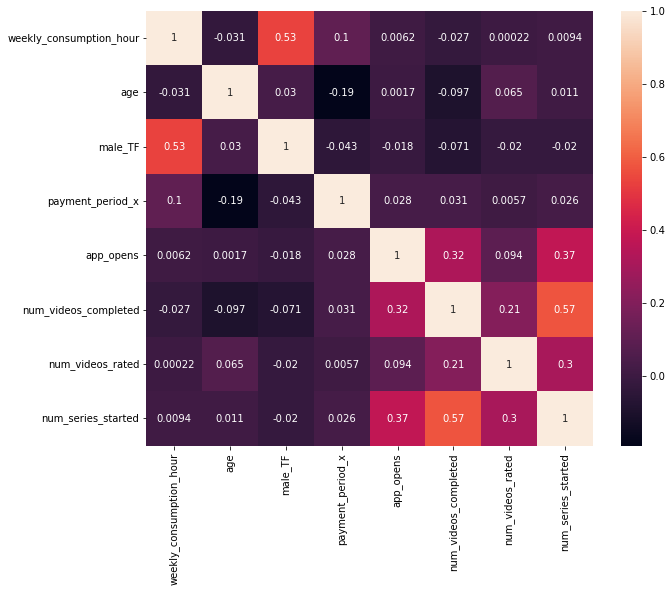

In [155]:
plt.figure(figsize=(10, 8))
corrMatrix = all_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()


In [156]:
dummy_X = pd.get_dummies(all_df,prefix=None,prefix_sep="_",dummy_na=False,
                       columns=[
#                            'preferred_genre',
#                                   'intended_use',
                                'male_TF',
#                                 'op_sys',
#                                 'package_type'
                               ],drop_first=True)
# dummy_X = pd.get_dummies(behavior_df,prefix=None,prefix_sep="_",dummy_na=False,
#                        columns=['package_type'],drop_first=True)
# dummy_X = pd.get_dummies(all_df,prefix=None,prefix_sep="_",dummy_na=False,
#                        columns=['preferred_genre',
#                                 'intended_use',
#                                 'male_TF',
#                                 'op_sys',
#                                 'package_type'
#                                ],drop_first=True)
dummy_X

,weekly_consumption_hour,age,payment_period_x,app_opens,num_videos_completed,num_videos_rated,num_series_started,male_TF_True
0,36.001186,25.0,0,1.000000,6.500000,0.000000,0.500000,1
1,20.051667,61.0,1,0.975610,4.439024,0.146341,0.951220,0
2,34.551230,23.0,1,2.260870,1.826087,0.000000,0.630435,0
3,25.851492,73.0,1,1.500000,1.000000,0.000000,0.000000,0
4,37.451142,24.0,1,2.000000,1.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...
135014,28.000000,46.0,0,1.785714,3.285714,0.107143,0.785714,0
135015,28.751405,61.0,1,1.000000,0.000000,0.000000,0.000000,0
135016,24.401536,43.0,1,2.583333,3.916667,0.000000,0.666667,0
135017,28.751405,38.0,1,1.777778,2.222222,0.000000,0.222222,0


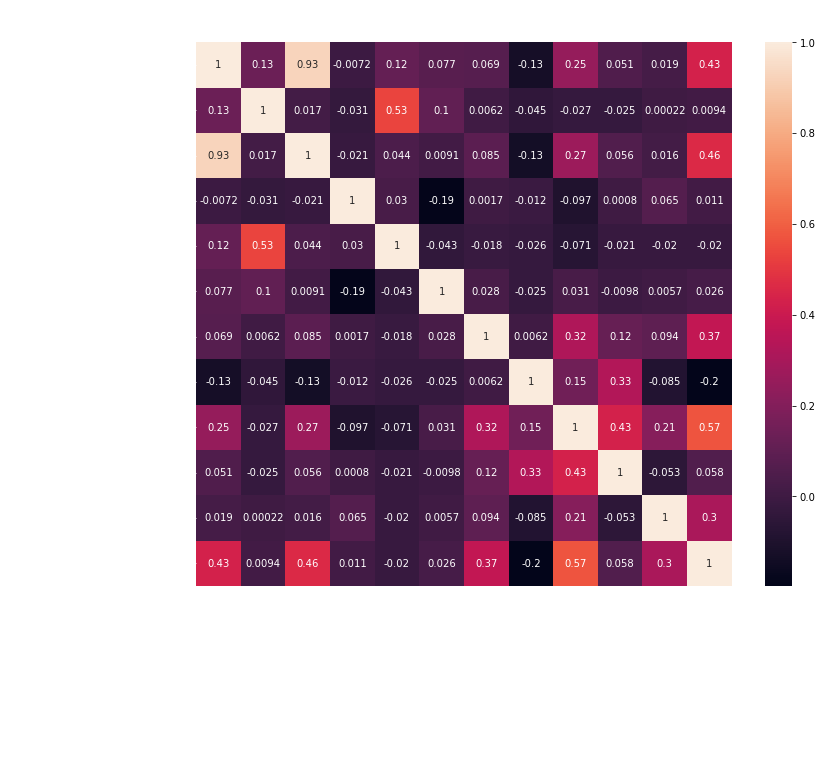

In [198]:
plt.figure(figsize=(12, 10))
corrMatrix = all_df.corr()
sn.heatmap(corrMatrix, annot=True)
ax=plt.gca()  
#不显示边框
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
plt.title('Correlation Matrix\n',fontsize=15,loc='left',c='white')
file_path = 'Correlation.png'
plt.savefig(file_path,dpi=300,bbox_inches='tight',transparent=True)
plt.show()

In [158]:
std=StandardScaler().fit(dummy_X)
dummy_X_std = pd.DataFrame(std.transform(dummy_X))

In [159]:
dummy_X_std

,0,1,2,3,4,5,6,7
0,1.842738,-1.677793,-0.996810,-0.519059,2.505235,-0.278477,0.092531,2.912674
1,-1.816597,1.225932,0.278546,-0.534793,1.216845,1.633182,1.329657,-0.343327
2,1.510072,-1.839111,0.278546,0.294352,-0.416596,-0.278477,0.450149,-0.343327
3,-0.485930,2.193840,0.278546,-0.196499,-0.933012,-0.278477,-1.278339,-0.343327
4,2.175405,-1.758452,0.278546,0.126060,-0.933012,-0.278477,-1.278339,2.912674
...,...,...,...,...,...,...,...,...
135014,0.007007,0.016046,-0.996810,-0.012180,0.495870,1.121131,0.875885,-0.343327
135015,0.179404,1.225932,0.278546,-0.519059,-1.558148,-0.278477,-1.278339,-0.343327
135016,-0.818597,-0.225931,0.278546,0.502380,0.890301,-0.278477,0.549487,-0.343327
135017,0.179404,-0.629226,0.278546,-0.017300,-0.168958,-0.278477,-0.669064,-0.343327


In [ ]:
SSE = []
for k in range(1,10):
    estimator = KMeans(n_clusters=k,random_state=42)
    estimator.fit(dummy_X_std)
    SSE.append(estimator.inertia_)
X = range(1, 10)

plt.show()

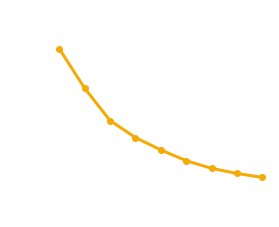

In [185]:

plt.figure(figsize=(4, 2.6))
plt.xlabel('Cluster Number K',fontsize=15)
plt.ylabel('SSE',fontsize=15)
plt.plot(X, SSE, 'o-',color='#f5ab06',linewidth=3)
# plt.yticks(fontsize=12)
# plt.xticks(fontsize=12)
#plt.axis('off')
ax=plt.gca()  
#不显示边框
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')


plt.title('Elbow Test\n',fontsize=15,loc='left',c='white')
file_path = 'elbow.png'
plt.savefig(file_path,dpi=300,bbox_inches='tight',transparent=True)

In [203]:
model = KMeans(n_clusters=3,random_state=42)
model.fit(dummy_X)

KMeans(n_clusters=3, random_state=42)

In [204]:
merge2['cluster'] =model.labels_
centers = model.cluster_centers_

In [205]:
merge2.cluster.value_counts()

2    66579
0    36620
1    31820
Name: cluster, dtype: int64

In [222]:
# dummy_X.groupby(['cluster']).agg({'payment_period_x': np.mean}).reset_index().sort_values('payment_period_x',ascending=False)

merge2.groupby(['cluster']).agg(np.mean).reset_index().sort_values('cluster',ascending=True)
# weekly_consumption_hour    0
# age                        0
# male_TF                    0
# payment_period_x           0
# app_opens                  0
# num_videos_completed       0
# num_videos_rated           0
# num_series_started         0



,cluster,Unnamed: 0,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,months_per_bill_period,monthly_price,discount_price,initial_credit_card_declined,join_fee,num_trial_days,current_sub_TF,payment_period_x,trial_completed,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period_y,sum
0,0,388387.598908,2.498693e+07,2.128127,28.023394,1.459476,30.325119,0.107946,4.0,4.734359,4.514471,0.052185,0.087021,13.997324,0.661906,0.942518,0.913108,1.706906,0.725244,2.704929,4.777051,0.010388,0.431486,0.150670,10.356004
1,1,352573.856725,2.497765e+07,2.096040,27.674065,1.401728,62.518803,0.130201,4.0,4.734395,4.514498,0.027216,0.145918,13.997800,0.410465,0.550063,0.827813,1.723314,0.713136,2.291901,4.785586,0.022841,0.434835,0.240198,9.971613
2,2,292374.206927,2.499520e+07,1.476892,28.080968,0.990778,46.323299,0.092236,4.0,4.734001,4.514075,0.028643,0.113617,13.996846,0.582586,0.803737,0.883732,1.897171,0.557210,2.471522,4.587287,0.026602,0.500387,0.349458,10.040179


In [206]:
cluster1=merge2[merge2['cluster']==0]
cluster2=merge2[merge2['cluster']==2]
cluster3=merge2[merge2['cluster']==1]

In [232]:
cluster1.intended_use.value_counts()/sum(cluster1.intended_use.value_counts())

access to exclusive content    0.347652
replace OTT                    0.322911
supplement OTT                 0.120644
expand international access    0.082114
expand regional access         0.080311
education                      0.028755
other                          0.017613
Name: intended_use, dtype: float64

In [233]:
cluster2.intended_use.value_counts()/sum(cluster2.intended_use.value_counts())

access to exclusive content    0.413253
replace OTT                    0.307124
supplement OTT                 0.110515
expand regional access         0.062062
expand international access    0.059538
education                      0.024452
other                          0.023055
Name: intended_use, dtype: float64

In [234]:
cluster3.intended_use.value_counts()/sum(cluster3.intended_use.value_counts())

access to exclusive content    0.412571
replace OTT                    0.228755
expand regional access         0.102451
supplement OTT                 0.097863
expand international access    0.074859
other                          0.052514
education                      0.030987
Name: intended_use, dtype: float64

In [235]:
cluster1.preferred_genre.value_counts()/sum(cluster1.intended_use.value_counts())

comedy           0.744238
drama            0.157400
regional         0.059585
other            0.019470
international    0.019306
Name: preferred_genre, dtype: float64

In [236]:
cluster2.preferred_genre.value_counts()/sum(cluster2.intended_use.value_counts())

comedy           0.743448
drama            0.184473
regional         0.037865
international    0.020712
other            0.013503
Name: preferred_genre, dtype: float64

In [237]:
cluster3.preferred_genre.value_counts()/sum(cluster3.intended_use.value_counts())

comedy           0.671056
drama            0.246826
international    0.040352
other            0.021527
regional         0.020239
Name: preferred_genre, dtype: float64

<AxesSubplot:>

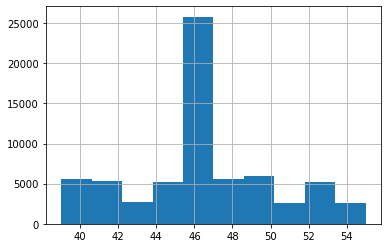

In [211]:
cluster2.age.hist()

<AxesSubplot:>

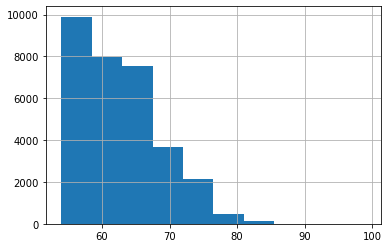

In [212]:
cluster3.age.hist()

In [168]:
31820/(66579+36620+31820)

0.23567053525800072

In [472]:
merge2.groupby(['cluster']).agg({'payment_period_x': np.mean}).reset_index().sort_values('payment_period_x',ascending=False)



,cluster,payment_period_x
0,0,0.942518
2,2,0.803737
1,1,0.550063


In [473]:
origin_centers = std.inverse_transform(centers)
origin_centers

array([[1.50111745e+02, 4.21767955e+02, 1.52061744e+00, 4.45047089e+00,
        6.81944118e+00, 2.21132271e-02, 6.23627755e-01, 1.38597503e-01],
       [1.48589165e+02, 8.20901092e+02, 1.21289540e+00, 4.47590483e+00,
        6.15874009e+00, 2.30665201e-02, 6.24849329e-01, 1.45432468e-01],
       [1.50362687e+02, 6.20111328e+02, 1.41180004e+00, 4.74540135e+00,
        6.44607071e+00, 2.33543807e-02, 6.48758361e-01, 1.33772509e-01]])

# Attribution and Allocation

In [309]:
cost = pd.read_csv('data/channel_spend_graduate.csv')
cost1 = pd.pivot_table(cost, values='spend_AED', index=['date'],columns=['channel'], aggfunc=np.mean)

cost1 = pd.DataFrame({'bing':cost1['bing'],
                      'display':cost1['display'],
                      'facebook':cost1['facebook'],
                      'search':cost1['search'],
                      'youtube':cost1['youtube']})
cost1.reset_index(inplace=True)
cost1.iloc[:,1:].sum(axis=0)*100/sum(cost1.iloc[:,1:].sum(axis=0))

bing         3.034594
display      0.102839
facebook    31.891339
search      62.518264
youtube      2.452964
dtype: float64

In [306]:
cost1

,date,bing,display,facebook,search,youtube
0,201907,400,12,9000,13000,90
1,201908,900,20,13000,18500,180
2,201909,1000,13,10500,19000,100
3,201910,1100,19,17000,24000,130
4,201911,1300,29,23000,25000,550
5,201912,300,31,16000,38000,900
6,202001,2100,148,11000,41000,4360
7,202002,3700,94,14000,44000,2420


In [370]:
cost1.iloc[:,1:].max(axis=0)*1.3


bing         4810.0
display       192.4
facebook    29900.0
search      57200.0
youtube      5668.0
dtype: float64

In [347]:
cost1.iloc[:,1:].sum(axis=1).diff()

0        NaN
1    10098.0
2    -1987.0
3    11636.0
4     7630.0
5     5352.0
6     3377.0
7     5606.0
dtype: float64

In [350]:
cost1.iloc[:,1:].sum(axis=1)

0    22502
1    32600
2    30613
3    42249
4    49879
5    55231
6    58608
7    64214
dtype: int64

In [251]:
df=cost1
df['date']=df['date'].apply(lambda v: datetime.datetime.strptime(str(v), '%Y%m'))

In [349]:
60000/7

8571.42857142857

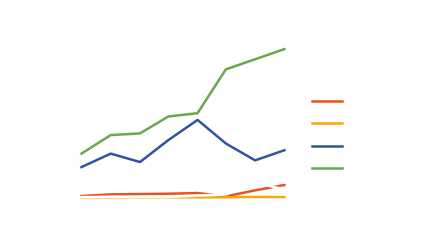

In [265]:

plt.figure(figsize=(4, 3))
plt.plot(df['date'],df['bing'],label='bing',linewidth=2.5,c='#e95120')
plt.plot(df['date'],df['display'],label='display',linewidth=2.5,c='#f5ab06')
plt.plot(df['date'],df['facebook'],label='facebook',linewidth=2.5,c='#3154a1')
plt.plot(df['date'],df['search'],label='search',linewidth=2.5,c='#6aa84fff')
plt.plot(df['date'],df['youtube'],label='youtube',linewidth=2.5,c='#ffffff')
plt.legend( loc='best', borderaxespad=0,fontsize=15)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

ax=plt.gca()  
#不显示边框
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
locator = mdates.AutoDateLocator(minticks=5, maxticks=9)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.ylabel('Cost',fontsize=15)

l = plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0,fontsize=15, frameon=False)
for text in l.get_texts():
    text.set_color("white")

plt.title('Channel Spend\n',fontsize=15,loc='left',c='white')
file_path = 'Channel.png'

plt.savefig(file_path,dpi=300,bbox_inches='tight',transparent=True)

In [771]:
cost2 = pd.read_csv('data/data_1/advertising_spend_data.csv')
cost2['date']=pd.to_datetime(cost2['date']).dt.to_period('M').astype(str)
cost2['date'] =cost2['date'].str.replace('-','')

In [774]:
cost2

,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,201906,84800.0,75000.0,17300.0,21400.0,11900.0,10500.0,5900.0,6100.0
1,201907,60000.0,75600.0,17300.0,21300.0,12000.0,29800.0,6000.0,6600.0
2,201908,52300.0,76100.0,18100.0,21300.0,16300.0,65900.0,6200.0,6800.0
3,201909,49000.0,75800.0,18900.0,21300.0,16400.0,73700.0,6000.0,7400.0
4,201910,51300.0,76000.0,21000.0,21400.0,12200.0,32300.0,6700.0,7300.0
5,201911,56100.0,75900.0,21400.0,21600.0,11700.0,9800.0,6300.0,7300.0
6,201912,51400.0,76100.0,32100.0,22200.0,12100.0,3500.0,7200.0,8000.0
7,202001,49000.0,75500.0,33600.0,22700.0,14300.0,300.0,6700.0,7400.0
8,202002,49700.0,76600.0,30100.0,21700.0,15000.0,300.0,6400.0,6500.0
9,202003,49100.0,78000.0,22700.0,21200.0,17600.0,300.0,5900.0,10000.0


<AxesSubplot:xlabel='date'>

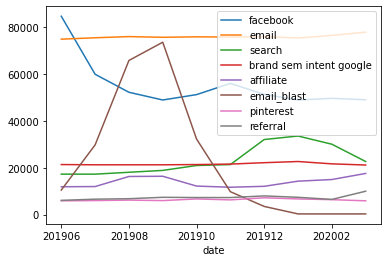

In [776]:
cost2.plot(x='date',y=['facebook', 'email', 'search', 'brand sem intent google',
       'affiliate', 'email_blast', 'pinterest', 'referral'])

In [360]:
def draw_plt(df,name,path):
    
    df['date']=df['account_creation'].apply(lambda v: datetime.datetime.strptime(str(v), '%Y%m'))
    plt.figure(figsize=(4,3))
    plt.plot(df['date'],df['bing'],label='bing',linewidth=2.5,c='#e95120')
    plt.plot(df['date'],df['display'],label='display',linewidth=2.5,c='#f5ab06')
    plt.plot(df['date'],df['facebook'],label='facebook',linewidth=2.5,c='#3154a1')
    plt.plot(df['date'],df['search'],label='search',linewidth=2.5,c='#6aa84fff')
    plt.plot(df['date'],df['youtube'],label='youtube',linewidth=2.5,c='#ffffff')

    plt.legend( loc='best', borderaxespad=0,fontsize=15)

    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    #plt.axis('off')
    ax=plt.gca()  
    #不显示边框
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='y', colors='white')
    locator = mdates.AutoDateLocator(minticks=5, maxticks=9)
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

    plt.ylabel('Cost',fontsize=15)

    l = plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0,fontsize=15, frameon=False)
    for text in l.get_texts():
        text.set_color("white")

    plt.ylabel('Count',fontsize=15)

    plt.title('%s\n'%name,fontsize=15,loc='left',c='white')
    file_path = '%s.png'%path
    plt.savefig(file_path,dpi=300,bbox_inches='tight',transparent=True)

In [268]:
merge1.account_creation_date = pd.to_datetime(merge1.account_creation_date)
merge1['account_creation'] = pd.to_datetime(merge1['account_creation_date']).dt.to_period('M').astype(str)
merge1['account_creation'] =merge1['account_creation'].str.replace('-','')

In [310]:
attribution_technical = pd.pivot_table(merge1, values='subid', index=['account_creation'],columns=['attribution_technical'], aggfunc='count')
attribution_survey = pd.pivot_table(merge1, values='subid', index=['account_creation'],columns=['attribution_survey'], aggfunc='count')

In [326]:
attribution_technical.sum(axis =0)*100

attribution_technical
affiliate                   989400.0
appstore                      4400.0
bing                        114600.0
bing_organic                 36900.0
brand sem intent bing       223100.0
brand sem intent google    1852400.0
content_greatist               500.0
criteo                        4400.0
direct_mail                  13900.0
discovery                   257100.0
display                     140700.0
email                      2569000.0
email_blast                 727700.0
facebook                   8025100.0
facebook_organic            327200.0
google_organic             1069100.0
influencer                    2100.0
internal                    112200.0
organic                    2201300.0
other                       178600.0
ott                          15800.0
pinterest                   606500.0
pinterest_organic             3000.0
playstore                     1200.0
podcast                      98500.0
quora                        10000.0
referral        

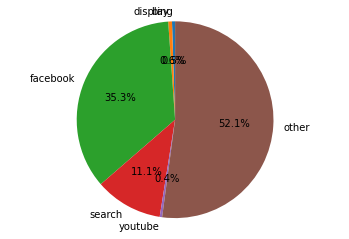

In [324]:
labels = ['bing', 'display', 'facebook', 'search','youtube','other']
sizes_1 = [0.503453,0.618114, 35.255329, 11.117261,0.401093]
sizes_2 = 100-sum(sizes_1)  
sizes=sizes_1+[sizes_2]
explode = (0, 0,0, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [325]:
sum(attribution_technical.sum(axis =0))

227628.0

In [353]:
attribution_technical = pd.DataFrame({'bing':attribution_technical['bing'],
                      'display':attribution_technical['display'],
                      'facebook':attribution_technical['facebook'],
                      'search':attribution_technical['search'],
                      'youtube':attribution_technical['youtube']}).drop(index={'201906','202003'})
attribution_survey = pd.DataFrame({
                      'facebook':attribution_survey['facebook'],
                      'search':attribution_survey['search'],
                      'youtube':attribution_survey['youtube']}).drop(index={'201906','202003'})
attribution_technical.reset_index(inplace=True)
attribution_survey.reset_index(inplace=True)

In [354]:
attribution_technical

,account_creation,bing,display,facebook,search,youtube
0,201907,120.0,44.0,10011.0,1328.0,8.0
1,201908,71.0,74.0,9855.0,1939.0,15.0
2,201909,84.0,12.0,6129.0,1852.0,2.0
3,201910,86.0,50.0,9489.0,2333.0,11.0
4,201911,103.0,90.0,12995.0,2510.0,47.0
5,201912,28.0,112.0,9288.0,3770.0,76.0
6,202001,172.0,536.0,6289.0,4073.0,370.0
7,202002,303.0,341.0,7988.0,4300.0,205.0


In [355]:
attribution_survey

,account_creation,facebook,search,youtube
0,201907,14451.0,536.0,85.0
1,201908,15399.0,786.0,264.0
2,201909,11702.0,783.0,209.0
3,201910,13418.0,853.0,274.0
4,201911,16930.0,864.0,312.0
5,201912,13394.0,1032.0,245.0
6,202001,10157.0,1151.0,725.0
7,202002,11809.0,1344.0,546.0


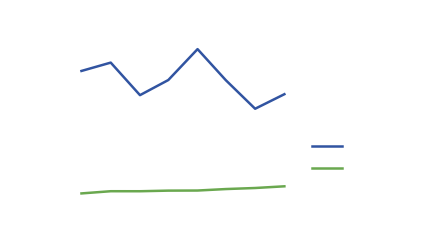

In [289]:
draw_plt(attribution_survey,'Attribution (Survey)','attribution_survey')


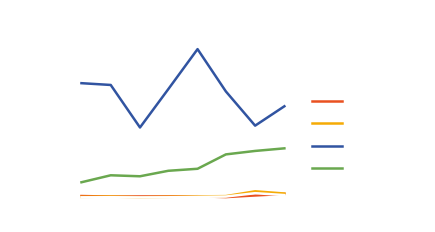

In [361]:
draw_plt(attribution_technical,'Attribution (Technical)','attribution_technical')

# By Last Interaction

In [357]:
CAC=cost1.copy()

In [358]:
CAC['bing'] = cost1['bing']/attribution_technical['bing']
CAC['display'] = cost1['display']/attribution_technical['display']
CAC['facebook'] = cost1['facebook']/attribution_technical['facebook']
CAC['search'] = cost1['search']/attribution_technical['search']
CAC['youtube'] = cost1['youtube']/attribution_technical['youtube']
CAC['date']=CAC['date'].apply(lambda v: datetime.datetime.strptime(str(v), '%Y%m'))

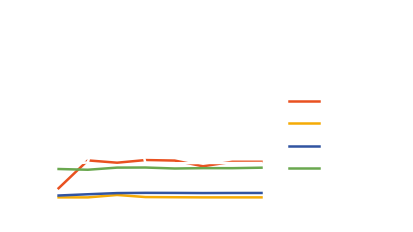

In [368]:
df=CAC
plt.figure(figsize=(4,3))
plt.plot(df['date'],df['bing'],label='bing',linewidth=2.5,c='#e95120')
plt.plot(df['date'],df['display'],label='display',linewidth=2.5,c='#f5ab06')
plt.plot(df['date'],df['facebook'],label='facebook',linewidth=2.5,c='#3154a1')
plt.plot(df['date'],df['search'],label='search',linewidth=2.5,c='#6aa84fff')
plt.plot(df['date'],df['youtube'],label='youtube',linewidth=2.5,c='#ffffff')
plt.legend( loc='best', borderaxespad=0,fontsize=15)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
#plt.axis('off')
ax=plt.gca()  
#不显示边框
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
locator = mdates.AutoDateLocator(minticks=5, maxticks=9)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.ylabel('Cost',fontsize=15)

l = plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0,fontsize=15, frameon=False)
for text in l.get_texts():
    text.set_color("white")

plt.title('CAC by Month\n',fontsize=15,loc='left',c='white')
file_path = 'CAC.png'

plt.savefig(file_path,dpi=300,bbox_inches='tight',transparent=True)



# By Impression

In [410]:
CAC=cost1.copy()
# CAC['bing'] = cost1['bing']/attribution_technical['bing']
# CAC['display'] = cost1['display']/attribution_technical['display']
CAC['facebook'] = cost1['facebook']/attribution_survey['facebook']
CAC['search'] = cost1['search']/attribution_survey['search']
CAC['youtube'] = cost1['youtube']/attribution_survey['youtube']
CAC['date']=CAC['date'].apply(lambda v: datetime.datetime.strptime(str(v), '%Y%m'))

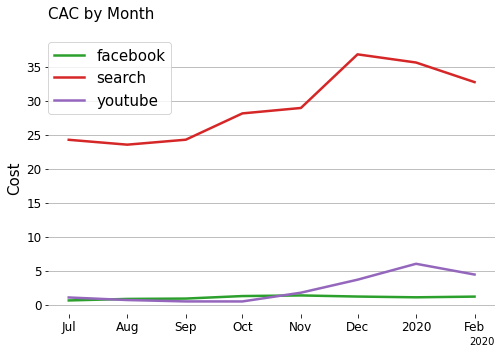

In [412]:
df=CAC
plt.figure(figsize=(8, 5))
# plt.plot(df['date'],df['bing'],label='bing',linewidth=2.5)
# plt.plot(df['date'],df['display'],label='display',linewidth=2.5)
plt.plot(df['date'],df['facebook'],label='facebook',linewidth=2.5,c='#2ca02c')
plt.plot(df['date'],df['search'],label='search',linewidth=2.5,c='#d62728')
plt.plot(df['date'],df['youtube'],label='youtube',linewidth=2.5,c='#9467bd')
plt.legend( loc='best', borderaxespad=0,fontsize=15)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
#plt.axis('off')
ax=plt.gca()  
#不显示边框
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')

locator = mdates.AutoDateLocator(minticks=5, maxticks=9)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.ylabel('Cost',fontsize=15)


plt.grid(axis='y')
plt.title('CAC by Month\n',fontsize=15,loc='left')
file_path = 'CAC.jpg'
# plt.savefig(file_path,dpi=300,bbox_inches='tight')

# Churn

In [372]:
# merge1['churn_TF']=np.where((merge1['payment_period_x']<=1)&
#                          ((merge1['current_sub_TF']==False)|(merge1['trial_completed']==False)), 1, 0)

merge1['churn_TF']=np.where(((merge1['current_sub_TF']==False)), 1, 0)

In [390]:
subs_filling_info = [
                      'preferred_genre'
                     ,'intended_use'
                     ,'weekly_consumption_hour'
                     ,'num_ideal_streaming_services'
                     ,'age'
                     ,'male_TF'
                     ,'op_sys'
                     ,'package_type'
                    ]
behavior = [
     'payment_period_x'
            ,'app_opens'
             ,'cust_service_mssgs'
            ,'num_videos_completed'
            ,'num_videos_more_than_30_seconds'
            ,'num_videos_rated'
             ,'num_series_started'
           ]

In [383]:
all_df = merge1[subs_filling_info+behavior+['churn_TF']]

In [384]:
all_df.dropna(axis=0,
    how='any',
    inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [385]:
all_df.shape[0]

135019

In [386]:
all_df['churn_TF'].value_counts() 

0    76088
1    58931
Name: churn_TF, dtype: int64

In [387]:
dummy_X = pd.get_dummies(all_df,prefix=None,prefix_sep="_",dummy_na=False,
                       columns=['preferred_genre',
                                'intended_use',
                                'male_TF',
                                'op_sys',
                                'package_type'
                               ],drop_first=True)
dummy_X

,weekly_consumption_hour,num_ideal_streaming_services,age,payment_period_x,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,churn_TF,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_True,op_sys_iOS,package_type_economy,package_type_enhanced
2,36.001186,2.0,25.0,0,1.000000,1.000000,6.500000,6.500000,0.000000,0.500000,1,0,0,0,1,0,0,0,0,1,0,1,1,0,1
6,20.051667,2.0,61.0,1,0.975610,0.414634,4.439024,4.439024,0.146341,0.951220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,34.551230,2.0,23.0,1,2.260870,0.217391,1.826087,4.478261,0.000000,0.630435,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8,25.851492,0.0,73.0,1,1.500000,1.500000,1.000000,6.500000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
11,37.451142,0.0,24.0,1,2.000000,1.500000,1.000000,6.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227620,28.000000,0.0,46.0,0,1.785714,0.571429,3.285714,6.285714,0.107143,0.785714,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
227621,28.751405,0.0,61.0,1,1.000000,2.000000,0.000000,6.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
227622,24.401536,2.0,43.0,1,2.583333,0.416667,3.916667,4.916667,0.000000,0.666667,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
227623,28.751405,2.0,38.0,1,1.777778,0.333333,2.222222,4.000000,0.000000,0.222222,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [388]:
X = dummy_X.drop('churn_TF', axis=1)
y = dummy_X.churn_TF

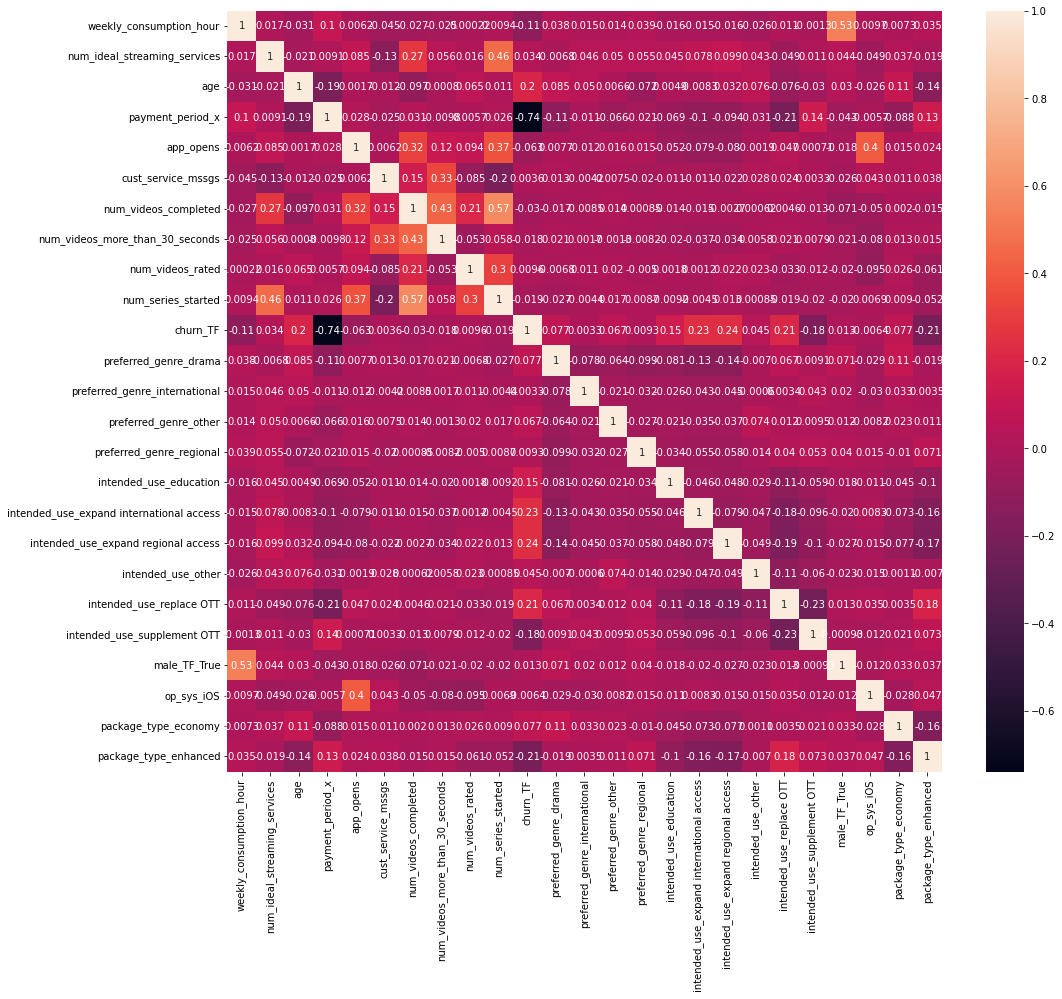

In [389]:
plt.figure(figsize=(16, 14))
corrMatrix = dummy_X.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [391]:
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offerΩ
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact

In [392]:
list(X.columns)

['weekly_consumption_hour',
 'num_ideal_streaming_services',
 'age',
 'payment_period_x',
 'app_opens',
 'cust_service_mssgs',
 'num_videos_completed',
 'num_videos_more_than_30_seconds',
 'num_videos_rated',
 'num_series_started',
 'preferred_genre_drama',
 'preferred_genre_international',
 'preferred_genre_other',
 'preferred_genre_regional',
 'intended_use_education',
 'intended_use_expand international access',
 'intended_use_expand regional access',
 'intended_use_other',
 'intended_use_replace OTT',
 'intended_use_supplement OTT',
 'male_TF_True',
 'op_sys_iOS',
 'package_type_economy',
 'package_type_enhanced']

In [464]:
# ----- READ IN DATA -----
df = dummy_X
df_train, df_test = model_selection.train_test_split(df, test_size=0.3)

# ----- FIT CHURN MODEL ------
y_col_name = 'churn_TF' # specify which column contains outcome variable y. Needs to be coded as binary True/False or 0/1
x_col_name =  list(X.columns) # list of x covariates
add_constant_TF = True

# --- preprocess data for model routine format requirements
if add_constant_TF:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)

# --- fit linear probability model
lpm_model = sm.OLS(endog=df_train[y_col_name], exog=df_train[x_col_name])
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())

# --- fit logistic regression
logit_model = sm.Logit(endog=df_train[y_col_name], exog=df_train[x_col_name])
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())


from contextlib import redirect_stdout

with open('modelsummary.txt', 'w') as f:
    with redirect_stdout(f):
        logit_results.summary()


RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     8038.
Date:                Sun, 12 Dec 2021   Prob (F-statistic):               0.00
Time:                        01:17:43   Log-Likelihood:                -15278.
No. Observations:               94513   AIC:                         3.061e+04
Df Residuals:                   94488   BIC:                         3.084e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [394]:
def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives


In [467]:
# ----- EVALUATE MODEL PERFORMANCE -----
# --- evaluate model predictions on test set graphically
df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name])
df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name])

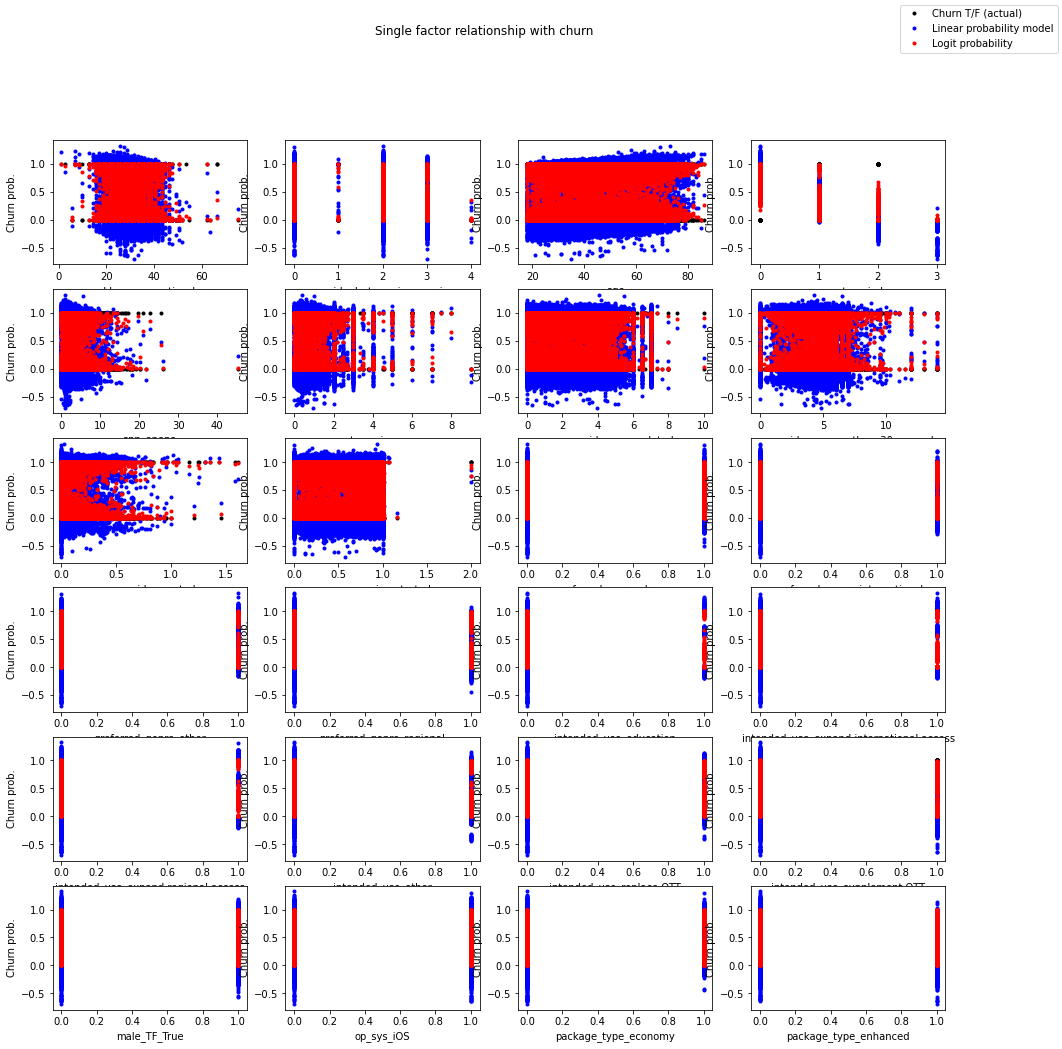

In [457]:


# plot predictions vs. data
select_plot_coef = [x for x in x_col_name if x != 'const']
n_rows = 6
n_cols = math.ceil(len(select_plot_coef) / n_rows)

fig, axes = plt.subplots(n_rows, n_cols,figsize=(16, 16))
fig.suptitle('Single factor relationship with churn')
for i in range(n_rows):
    for j in range(n_cols):
        select_coef = select_plot_coef[i * n_cols + j]
        axes[i, j].plot(df_test[select_coef], df_test['churn_TF'], 'k.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_lpm'], 'b.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_logit'], 'r.')
        axes[i, j].set(xlabel=select_coef, ylabel='Churn prob.')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])
plt.savefig('1.png',dpi=300)


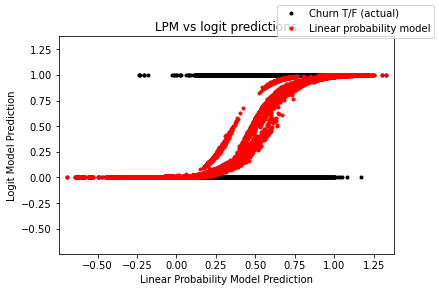

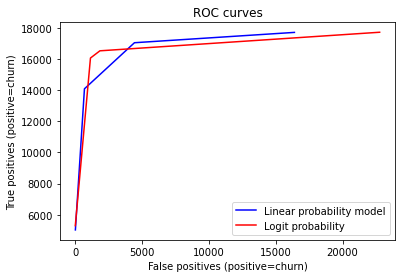

In [396]:
# compare lpm and logit predictions
fig = plt.figure()
ax = plt.gca()
ax.plot(df_test[['prob_churn_lpm']], df_test[['churn_TF']], 'k.')
ax.plot(df_test[['prob_churn_lpm']], df_test[['prob_churn_logit']], 'r.')
plt.ylim(df_test[['prob_churn_lpm', 'prob_churn_logit']].min().min()-.05, df_test[['prob_churn_lpm', 'prob_churn_logit']].max().max()+.05)
plt.xlim(ax.get_ylim())
plt.title('LPM vs logit predictions')
plt.xlabel('Linear Probability Model Prediction')
plt.ylabel('Logit Model Prediction')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])
plt.savefig('2.png',dpi=300,bbox_inches='tight')
# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_lpm'])

# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])
plt.savefig('3.png',dpi=300,bbox_inches='tight')



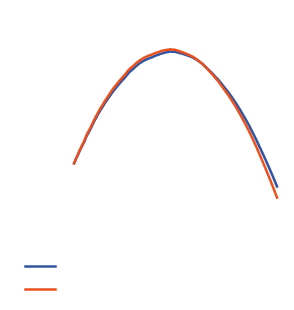

In [468]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
# acceptance_rate_nonchurn = 0.7
# acceptance_rate_churn = 0.3
threshold = 0.6
base_price = 10
# discount_amount = 0.3
cases = ['no_offer', 'lpm_offer', 'logit_offer']

# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)




df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    t_acceptance_rate_churn = t_discount_amount
    acceptance_rate_nonchurn = 0.4+0.6*t_discount_amount
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

# --- plot lift curves

# Discount amount sensitivity
fig = plt.figure(figsize=(4,3))
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-',linewidth=2.5,label='Linear probability model',c='#3154a1')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-',linewidth=2.5,label='Logit probability model',c='#e95120')

plt.xlabel('Offer discount amount',fontsize=15)
plt.ylabel('Revenue lift',fontsize=15)

ax=plt.gca()  
    #不显示边框
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

l = plt.legend(bbox_to_anchor=(-0.2,-0.6 ), loc=3, borderaxespad=0,fontsize=15, frameon=False)
for text in l.get_texts():
    text.set_color("white")
    

plt.title('Lift curves\n',fontsize=15,loc='left',c='white')

plt.savefig('6.png',dpi=300,bbox_inches='tight',transparent=True)

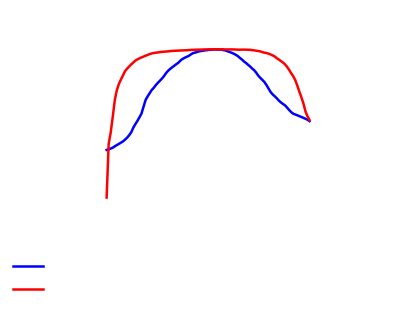

In [470]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 0.7
acceptance_rate_churn = 0.3
threshold = 0.6
base_price = 10
discount_amount = 0.3
cases = ['no_offer', 'lpm_offer', 'logit_offer']

# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind


# Threshold sensitivity
fig = plt.figure(figsize=(4,3))
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-',linewidth=2.5,label='Linear probability model')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-',linewidth=2.5,label='Logit probability model')

plt.xlabel('Threshold probability for predicting customer churns',fontsize=15)
plt.ylabel('Revenue lift',fontsize=15)
ax=plt.gca()  
    #不显示边框
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

l = plt.legend(bbox_to_anchor=(-0.4,-0.6 ), loc=3, borderaxespad=0,fontsize=15, frameon=False)
for text in l.get_texts():
    text.set_color("white")
    

plt.title('Lift curves\n',fontsize=15,loc='left',c='white')

plt.savefig('4.png',dpi=300,bbox_inches='tight',transparent=True)



In [403]:
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')

In [442]:
def roc_draw(y_test, pred):
    fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(3,3))
    plt.plot(fpr, tpr, 'b',linewidth=2.5, label = 'Val AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--',linewidth=2.5)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate',fontsize=15)
    plt.xlabel('False Positive Rate',fontsize=15)

    #plt.axis('off')
    ax=plt.gca()  
    #不显示边框
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='y', colors='white')
  


    l = plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0,fontsize=15, frameon=False)
    for text in l.get_texts():
        text.set_color("white")

    plt.title('ROC\n',fontsize=15,loc='left',c='white')
    file_path = 'roc.png'

#     plt.savefig(file_path,dpi=300,bbox_inches='tight',transparent=True)
    plt.show()

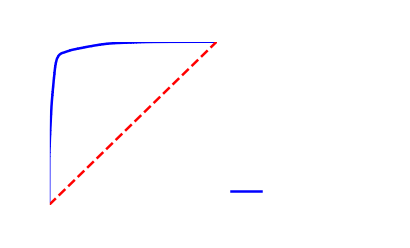

In [443]:
roc_draw(df_test['churn_TF'],df_test['prob_churn_lpm'])

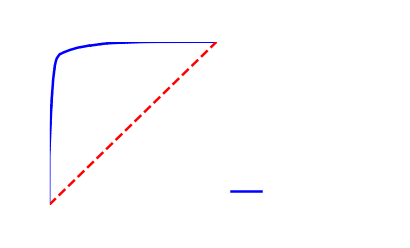

In [471]:
roc_draw(df_test['churn_TF'],df_test['prob_churn_logit'])

In [431]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = df_test['prob_churn_logit']>0.6
y_true = df_test['churn_TF']
print(accuracy_score(y_true, y_pred))

0.9318125709771392
